In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data = pd.read_excel('Diabetes/China China.xlsx')

In [20]:
type(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16969 entries, 0 to 16968
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         16969 non-null  int64  
 1   Blood Glucose Level(BGL)    16969 non-null  int64  
 2   Diastolic Blood Pressure    16969 non-null  int64  
 3   Systolic Blood Pressure     16969 non-null  int64  
 4   Heart Rate                  16969 non-null  int64  
 5   Body Temperature            16969 non-null  float64
 6   SPO2                        16969 non-null  int64  
 7   Sweating  (Y/N)             16969 non-null  int64  
 8   Shivering (Y/N)             16969 non-null  int64  
 9   Diabetic/NonDiabetic (D/N)  16969 non-null  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 1.3+ MB


In [21]:
data.describe()

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N)
count,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000,16969.000000
mean,30.988862,95.724733,77.173493,118.187165,91.524191,97.356146,97.382403,0.121692,0.145560
std,25.585606,42.993256,7.241511,7.700363,10.409780,0.813555,0.848689,0.326940,0.352674
min,9.000000,50.000000,60.000000,95.000000,78.000000,96.000132,93.000000,0.000000,0.000000
25%,9.000000,68.000000,71.000000,113.000000,84.000000,96.674466,97.000000,0.000000,0.000000
50%,14.000000,83.000000,76.000000,119.000000,89.000000,97.326523,98.000000,0.000000,0.000000
75%,55.000000,108.000000,83.000000,124.000000,95.000000,97.949904,98.000000,0.000000,0.000000
max,77.000000,250.000000,98.000000,145.000000,130.000000,98.999792,99.000000,1.000000,1.000000


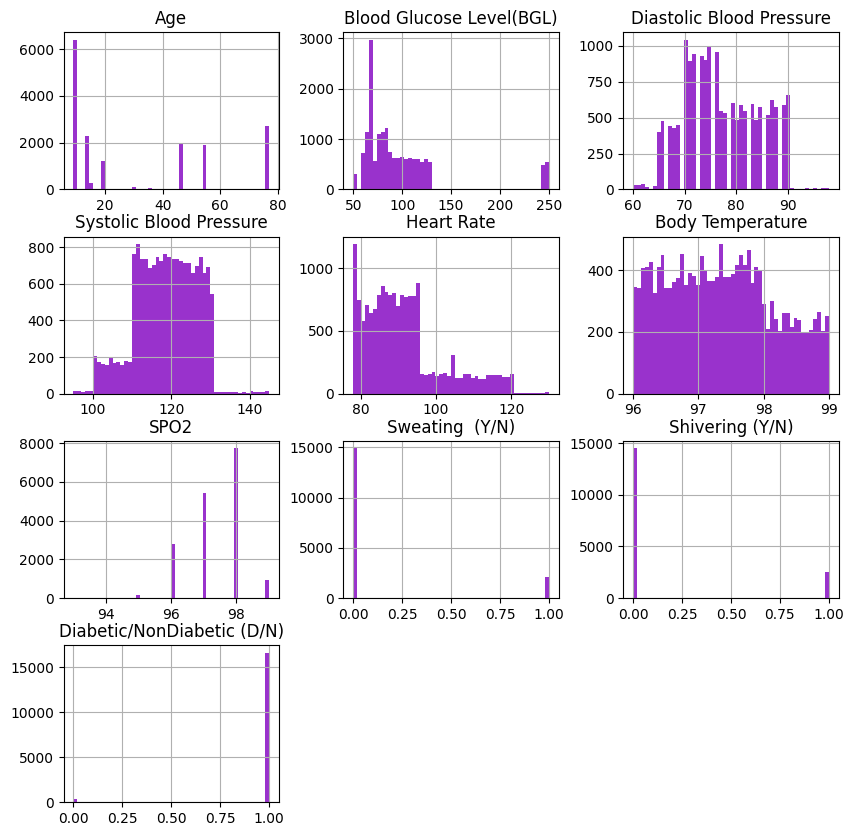

In [29]:
data.hist(bins=50, figsize=(10,10), color='darkorchid');

In [30]:
corr_matrix = data.corr().round(2)

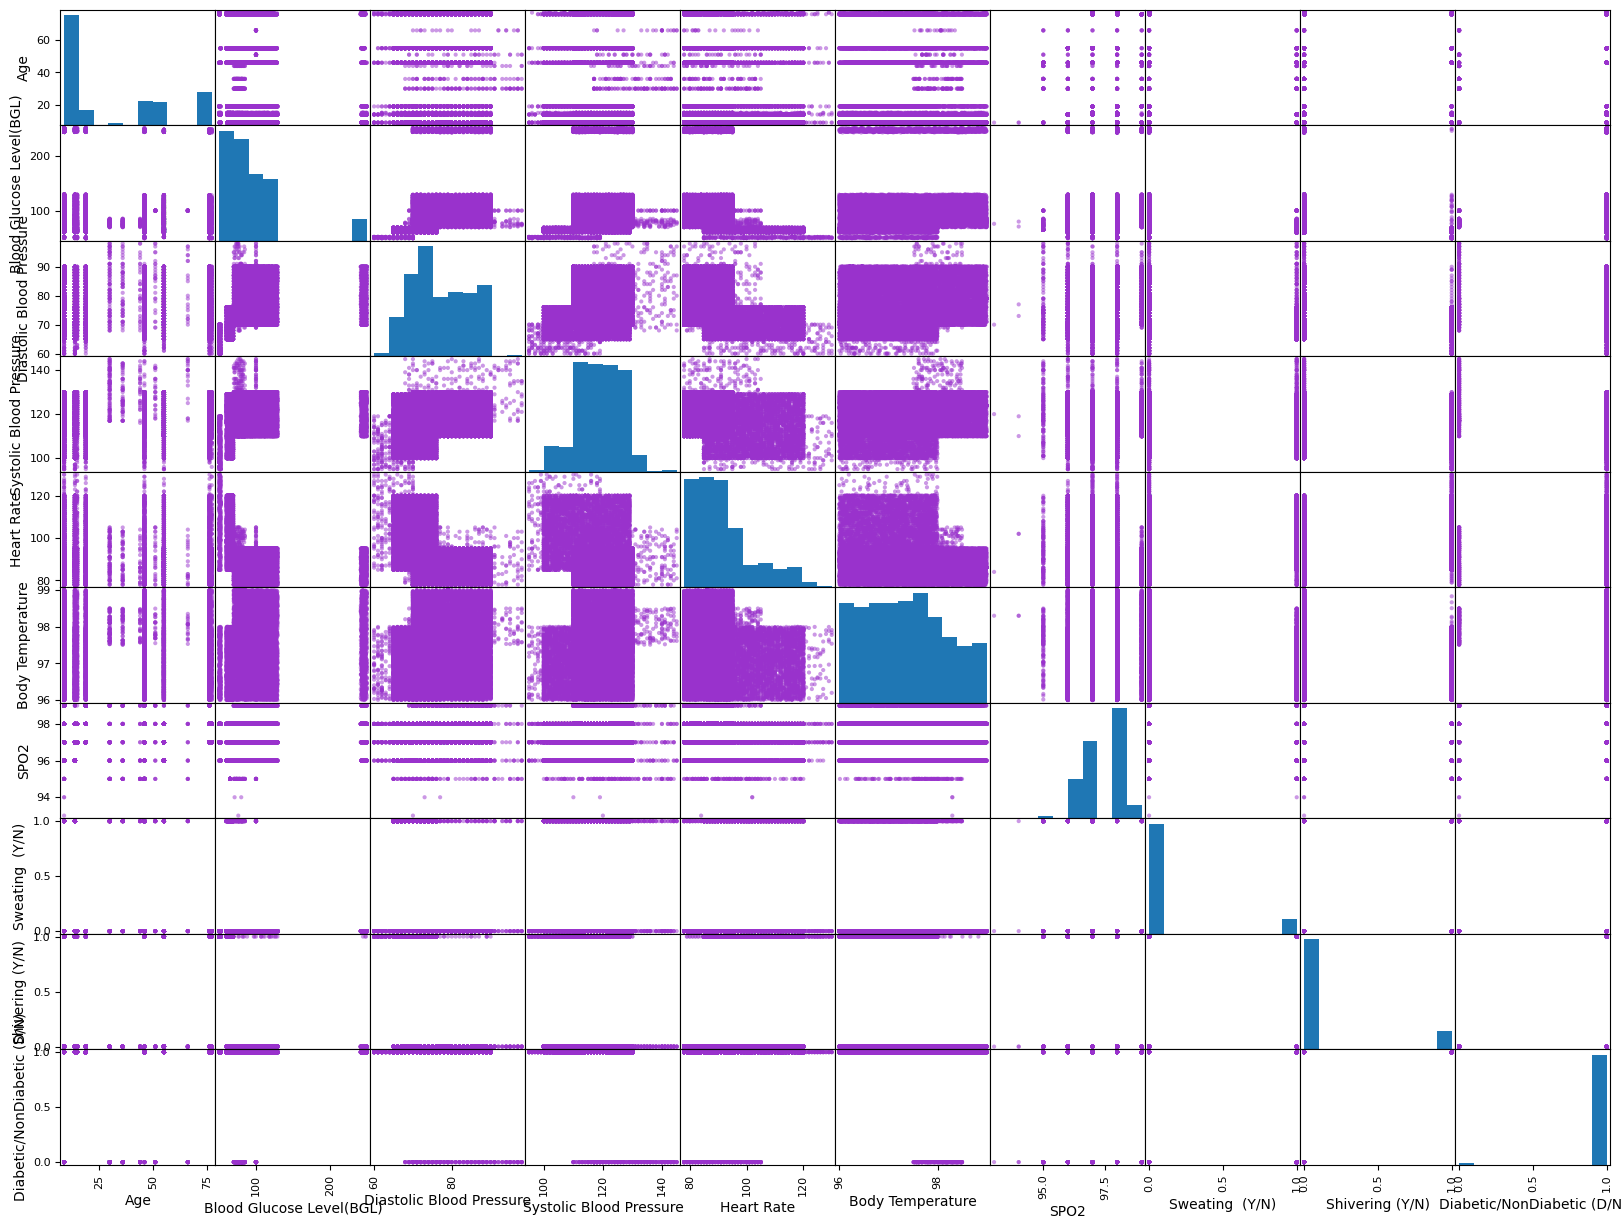

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize = (20,15), color = 'darkorchid');

In [35]:
from sklearn.model_selection import train_test_split
features = data[list(set(data.columns)-{'Blood Glucose Level(BGL)'})]

In [37]:
labels = data['Blood Glucose Level(BGL)']
features.columns

Index(['Diastolic Blood Pressure', 'SPO2', 'Heart Rate', 'Age',
       'Systolic Blood Pressure', 'Sweating  (Y/N)',
       'Diabetic/NonDiabetic (D/N)', 'Body Temperature', 'Shivering (Y/N)'],
      dtype='object')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)
y_train.head()

7927      91
6856      84
10208    106
8850      96
695       60
Name: Blood Glucose Level(BGL), dtype: int64

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [42]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [43]:
x = X_test.iloc[1:3]
y = y_test.iloc[1:3]

In [44]:
x

,Diastolic Blood Pressure,SPO2,Heart Rate,Age,Systolic Blood Pressure,Sweating (Y/N),Diabetic/NonDiabetic (D/N),Body Temperature,Shivering (Y/N)
7754,80,97,87,9,119,0,1,97.322946,0
1832,69,98,100,46,116,0,1,97.167371,0


In [45]:
y

7754    90
1832    63
Name: Blood Glucose Level(BGL), dtype: int64

In [46]:
lin_reg.predict(x)

array([105.17519703,  83.13250739])

In [56]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [49]:
y_train_pred = lin_reg.predict(X_train)

In [50]:
math.sqrt(mean_squared_error(y_train, y_train_pred))

38.98787925853068

Średni błąd 38 przy zakresie 50-250, nasz model jest o kant [...] :)) , czas na Lasek Losowy

In [51]:
from sklearn.ensemble import RandomForestRegressor
f_reg = RandomForestRegressor()
f_reg.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
scores = cross_val_score(f_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [58]:
rmse_scores

array([38.93000476, 38.33270642, 39.41186014, 38.30462397, 38.805914  ,
       39.34594697, 36.24323276, 40.63919648, 38.30813251, 34.85965565])

In [59]:
rmse_scores.mean(), rmse_scores.std()

(38.318127365257894, 1.5658564794307368)

In [62]:
param_grid = [
    {'n_estimators' : [45, 50, 55], 'max_features' : [10, 11, 12, 13]}
]

In [63]:
from sklearn.model_selection import GridSearchCV
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

In [64]:
np.sqrt(mean_squared_error(grid_search.best_estimator_.predict(full_pipeline.transform(X_test)), y_test))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'